IF USING PYTHON 3, DO NOT USE QUOTES.
What is the filename of the data to be analyzed?: 20160824_mbpTXSerg20screen.xlsx
We found the following columns:
['Strain' 'Tx (mg/L)' 'Unnamed: 2' '14.5825m' '15.0019m' '17.0714m']

Which column would you like to occupy the x-axis?: Strain
Which column would you like to occupy the y-axis?: Tx (mg/L)
What do you want the title of your graph to be: 
We found the following Tx (mg/L) values.
"1" TXS-GFP
"2" TXS-GFP 0809
"3" TXS-GFP,MBP-TXS-ERG20*
"4" Tx 50 mg/L

Enter the numbers of the columns you would like to plot, separated by a comma and space.
Or type asc to plot all in ascending order.
Your answer: 2, 4, 1, 3
What kind of a plot do you want. Type bar or box: box


/Users/leodespaux/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


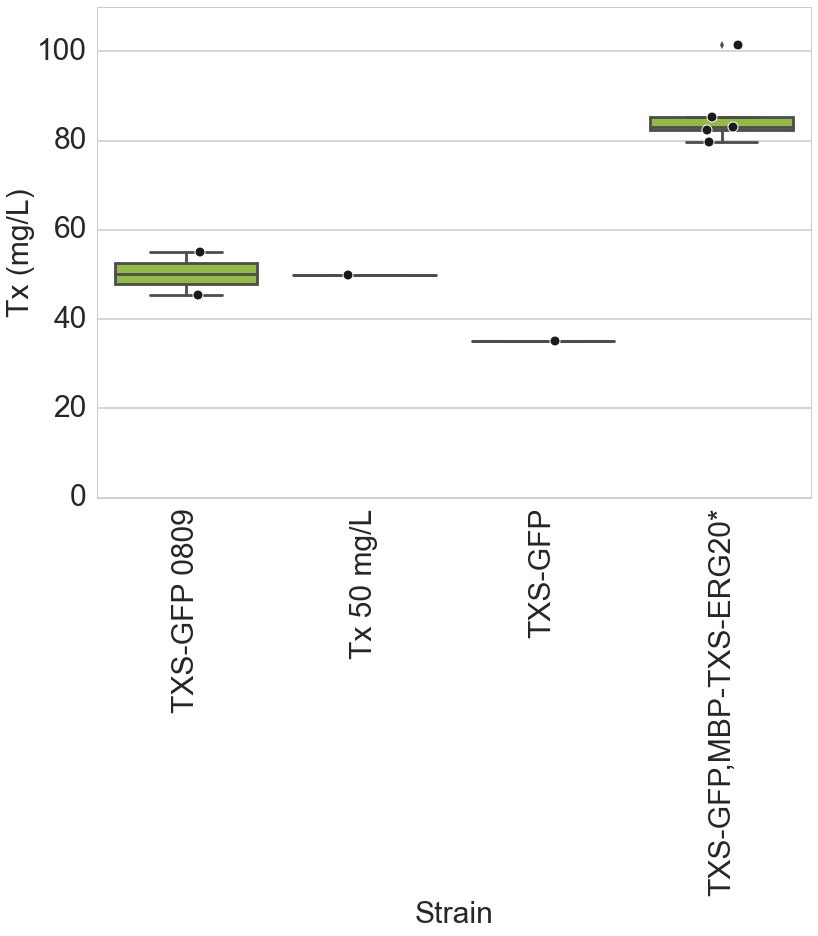

In [ ]:
'''
jAnalyzis
by Leo d'Espaux and William Zhuang
leodespaux@gmail.com

This programs takes tabular data and spits out graphs and processed files (mean, std, etc.).

It's meant to be simple enough that anyone can use it once you get it and the libraries installed. 

Open-source. Feel free to share, modify, etc. as you wish. 

Last updates:
4/1/15
*Fixed box plot to standard format
*fixed ascending order 
*color to same color

'''





##### import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import pandas as pd
from pandas import ExcelWriter
%matplotlib inline  






# Parses the excel file manually. Later they may be automatic parsers.
def parseExcelManual(filename):
    df = pd.read_excel(filename)
    print("We found the following columns:")
    print(df.columns.values)
    print("")
    xcol = input("Which column would you like to occupy the x-axis?: ")
    
    while xcol not in df.columns.values:
        print("Invalid column name")
        xcol = input("Please enter a valid column name: ")

    ycol = input("Which column would you like to occupy the y-axis?: ")
    while ycol not in df.columns.values:
        print("Invalid column name")
        ycol = input("Please enter a valid column name: ")

    title = input("What do you want the title of your graph to be: ")
    
    # making a new series, where xcol is the label, and then makes correspondence
    # between the label and the value
    DataOrg = pd.DataFrame(data={xcol: df[xcol], ycol: df[ycol]})
    
    # dropna removes anything thats without a value (NaN)
    DataOrg = DataOrg.dropna(axis = 0)
    
    # flips/trasnposes to make it easier to work with 
    DataOrg = DataOrg.pivot_table(ycol, xcol, DataOrg.index)
    DataOrg = DataOrg.T

    #Organize how you want it by making a dictionary 
    print("We found the following " + ycol + " values.")

    counter = 0
    valueDict = {}
    for value in DataOrg.columns.values:
        counter += 1
        print("\"" + str(counter) + "\"" " " + value)
        valueDict[str(counter)] = value
    print("")
    print("Enter the numbers of the columns you would like to plot, separated by a comma and space.")
    print("Or type asc to plot all in ascending order.")
    answer = input("Your answer: ")
    if answer=="asc":
         # Gets the mean of each column, orders the means by ascending value and reorders the columns based on the means.
        DataOrg = DataOrg.reindex_axis(DataOrg.mean().order().index, axis=1)
    
    else:
        splitNumbers = answer.split(", ")
    
        splitAnswer = []
        for number in splitNumbers: 
            splitAnswer.append(valueDict[number])

        # Handle removing columns and also reordering the columns.
        if answer != "":

            tempReorg = DataOrg.copy(deep=True)
            for index, value in DataOrg.iteritems():
                tempReorg.drop(index, axis = 1, inplace = True)

            for columnName in splitAnswer:
                tempReorg[columnName] = DataOrg[columnName]

            # Replace the organized data array with the one ordered by user
            DataOrg = tempReorg
        
    #Later can activate this option to normalize by highest value.
    normalize = "n" #input("Do you want to normalize the y-axis? (y/n): ")
    if normalize == 'y':
        # amax is the max value of the values, fills NaN with zeroes
        DataOrg = DataOrg / np.amax(DataOrg.fillna(0).values)
        title = title + " Normalized"
    
    
    makePlot(DataOrg, xcol, ycol, title)
    
    
    # Options of different outputs. For now, just a box plot
   

    



def makePlot(DataOrg, xcol, ycol, title):
    
    typePlot=input("What kind of a plot do you want. Type bar or box: ")
    
    if typePlot=="box":
        #set style
        sns.set_context("poster")
        sns.set_style("whitegrid")
        sns.boxplot(data=DataOrg, color="#9ACD32") #Color of the box itself
        # before was sns.boxplot(data=boxTable, palette = sns.color_palette("Set1", n_colors=8, desat=.3))
        #Colors: 9ACD32 =yellowgreen; 9933FF=purple; 9ACD32=cyan; 0000FF=blue; 66CCFF=lightblue


        #add on top the points themselves
        sns.stripplot(data=DataOrg, size = 10, jitter=True,color=".1")  #Color of the dots
        #sns.swarmplot(data=DataOrg, size = 10, jitter = True, color=".1")  #Color of the dots

        #here make styles
        sns.set_context("poster")
        sns.set_style("whitegrid")
        plt.ylabel(ycol, fontsize=30)
        plt.xlabel(xcol, fontsize=30)
        plt.title(title, fontsize=30)
        plt.gca().set_ylim(bottom = 0)
        #plt.gca().set_ylim(top = 1.1)
        plt.xticks(size=30, rotation=90) 
        plt.yticks(size=30) 
        plt.show()
        #sns.stripplot(data=DataOrg, size = 10, jitter = True, palette = sns.color_palette("Set1", n_colors=8, desat=0.9))
    
    #elif typePlot=="bar" :  
        #Fill in later
        
    elif typePlot=="bar":
        #set style
        sns.set_context("poster")
        sns.set_style("whitegrid")
        sns.barplot(data=DataOrg, color="#9ACD32") 
        #Colors: 9ACD32 =yellowgreen; 9933FF=purple
        # before was sns.boxplot(data=boxTable, palette = sns.color_palette("Set1", n_colors=8, desat=.3))

        #add on top the points themselves
        #sns.stripplot(data=DataOrg, size = 10, jitter=True,color=".1")  #Color of the dots
        #sns.swarmplot(data=DataOrg, size = 10, jitter = True, color=".1")  #Color of the dots

        #here make styles
        sns.set_context("poster")
        sns.set_style("whitegrid")
        plt.ylabel(ycol, fontsize=30)
        plt.xlabel(xcol, fontsize=30)
        plt.title(title, fontsize=30)
        plt.gca().set_ylim(bottom = 0)
        #plt.gca().set_ylim(top = 1.2)
        plt.xticks(size=30, rotation=90) 
        plt.yticks(size=30) 
        plt.show()
        #sns.stripplot(data=DataOrg, size = 10, jitter = True, palette = sns.color_palette("Set1", n_colors=8, desat=0.9))
    
    
    
    # Ask if you want a  file output with the values and the mean etc
    toExport = input("Do you want to export statistical data to an excel file? (y/n): ")    
    
    if toExport == 'y':
        exportExcel(DataOrg)
        
    

    


    
    
    
    
def exportExcel(tempTable):
    
    filename = input("What should the filename be? (Do not include extension): ")

    if ".xls" not in filename:
        filename = filename + ".xls"

    stdevSeries = tempTable.std(0)
    meanSeries = tempTable.mean(0)
    boxTable = tempTable.copy(deep=True)
    boxTable = boxTable.T.drop(boxTable.T, axis = 1)
    boxTable = boxTable.T

    outTable = tempTable.copy(deep=True)
    finalSeries = pd.DataFrame()

    for index, value in stdevSeries.iteritems():
        mean = meanSeries[index]
        stdev = stdevSeries[index]
        # make a separate data frame containing mean, std dev etc
        tempSer = pd.Series(data=[stdev, mean],
                            index = ["Standard Deviation", "Mean"])
        boxTable[index] = tempSer

    for index, value in tempTable.iteritems():
        outTable[index].dropna(inplace=True)
        tempSeries = outTable[index].reset_index(drop=True)
        finalSeries[index] = tempSeries

    finalSeries = finalSeries.append(boxTable)
    writer = ExcelWriter(filename)

    finalSeries.to_excel(writer,'Sheet1')
    
    writer.save()

    
    
# Initial user interface.
def askUser():
    print("IF USING PYTHON 3, DO NOT USE QUOTES.")
    filename = input("What is the filename of the data to be analyzed?: ")
    
    parseExcelManual(filename)

askUser()












'''

Hi baby. 

Give me a minute to get started.


'''